## Bank Marketing Campaign Case Study.

In this project you will learn Exploratory Data Analytics with the help of a case study on "Bank telemarketing campaign". This will enable you to understand how EDA can be a most important step in the process of Machine Learning.

#### Problem Statement:

Problem statement - 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

#### Importing the libraries.

In [5]:
import warnings 
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Collection and Data Types 

#### Read in the Data set. 

In [7]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

#### Read the file without unnecessary headers.

In [8]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv", skiprows =2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [9]:
inp0.drop("customerid", axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [10]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.2+ MB


In [11]:
#inp0.age = inp0.age.apply(lambda x: str(x))
#inp0.info()
#inp0.to_csv('bank_marketing_updated_v2.csv')

In [12]:
#average age of customers
inp0.age.mean()

40.93565090394105

#### Dividing jobedu into job and education. 

In [13]:
inp0['job']= inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [14]:
inp0['education']= inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [15]:
inp0.drop("jobedu", axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the month from column 'month' 

In [16]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))== True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


let's check the missing values in month column.

In [17]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Segment- 4, Impute/Remove missing values 

#### handling missing values in age column.

In [18]:
inp0.age.isnull().sum()

20

In [19]:
inp0.shape

(45211, 19)

In [20]:
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing. 

In [21]:
inp1= inp0[~inp0.age.isnull()].copy()
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [22]:
inp1.month.isnull().sum()

50

In [23]:
inp1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [24]:
month_mode= inp1.month.mode()[0]
month_mode

'may, 2017'

In [25]:
inp1.month.fillna(month_mode, inplace= True)
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [26]:
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [27]:
inp1.response.isnull().sum()

30

Target variable is better of not imputed.
- Drop the records with missing values.

In [28]:
inp1= inp1[~inp1.response.isnull()]

In [29]:
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [30]:
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Our objective is:
- we want the missing values to be ignored in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. will ignore the missing values.

In [31]:
inp1.loc[inp1.pdays<0, "pdays"]= np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

#### Age variable 

In [32]:
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

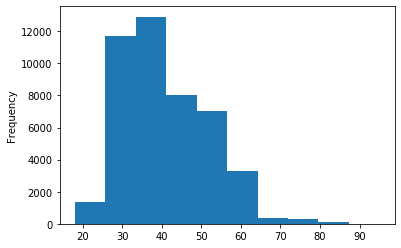

In [33]:
inp1.age.plot.hist()
plt.show()

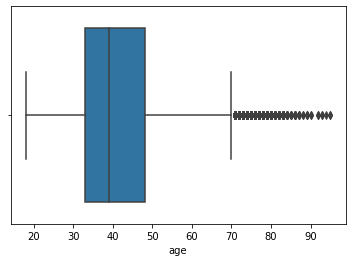

In [34]:
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [35]:
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

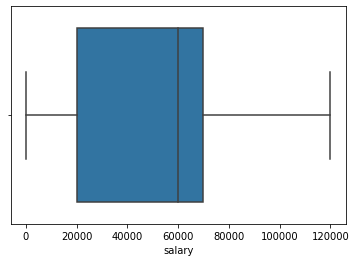

In [36]:
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [37]:
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

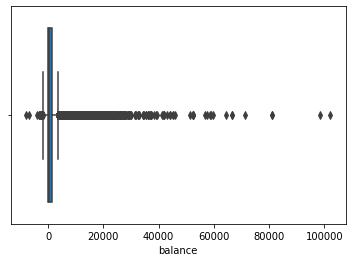

In [38]:
sns.boxplot(inp1.balance)
plt.show()

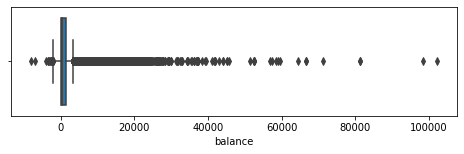

In [39]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [40]:
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

### Segment- 6, Standardising values 

#### Duration variable

In [41]:
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
inp1.duration= inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [43]:
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

#### Marital status 

In [44]:
inp1.marital.value_counts(normalize= True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

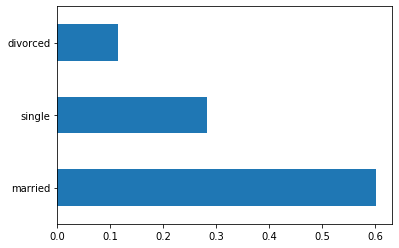

In [45]:
inp1.marital.value_counts(normalize= True).plot.barh()
plt.show()

#### Job  

In [46]:
inp1.job.value_counts(normalize= True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

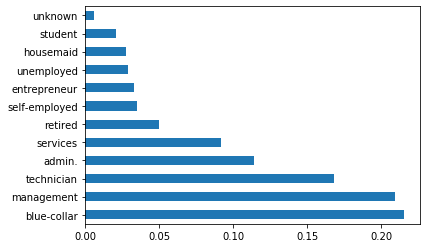

In [47]:
inp1.job.value_counts(normalize= True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

#### Education

In [48]:
inp1.education.value_counts(normalize= True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

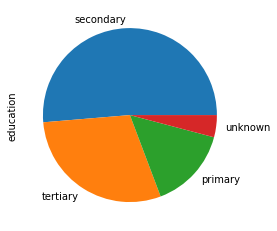

In [49]:
inp1.education.value_counts(normalize= True).plot.pie()
plt.show()

#### poutcome 

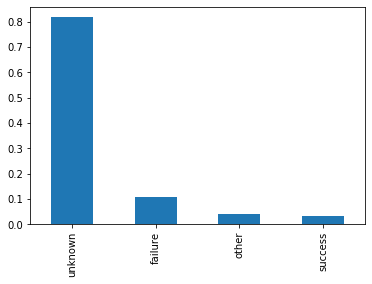

In [50]:
inp1.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

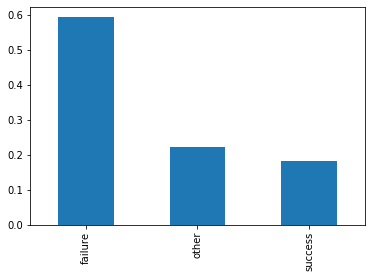

In [84]:
#Removing the unkown poutcome for better comparision plot
inp1[-(inp1.poutcome=='unknown')].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

#### Response the target variable 

In [51]:
inp1.response.value_counts(normalize= True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

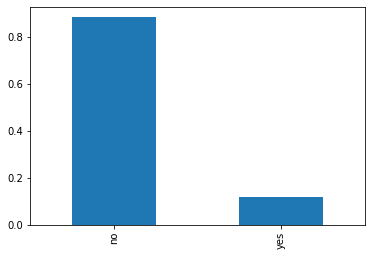

In [52]:
inp1.response.value_counts(normalize= True).plot.bar()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

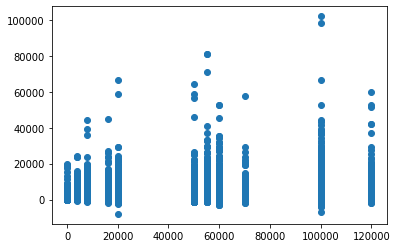

In [53]:
plt.scatter(inp1.salary, inp1.balance)
plt.show()

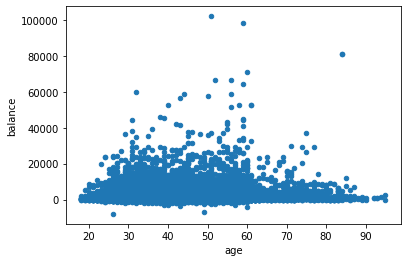

In [54]:
inp1.plot.scatter(x= "age", y= "balance")
plt.show()

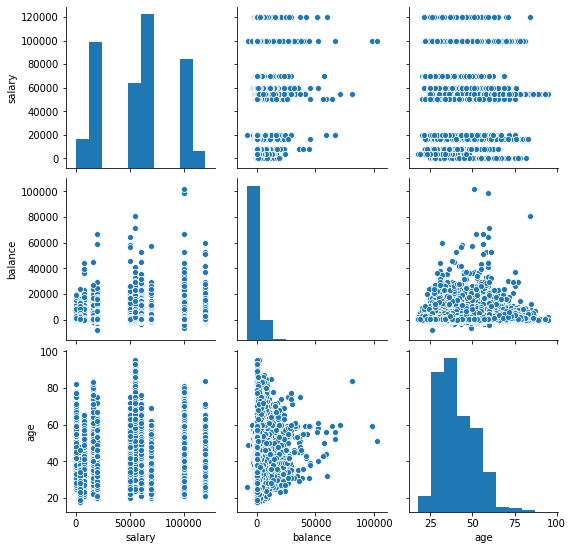

In [55]:
sns.pairplot(data= inp1, vars= ["salary", "balance", "age"])
plt.show()

#### Correlation heat map 

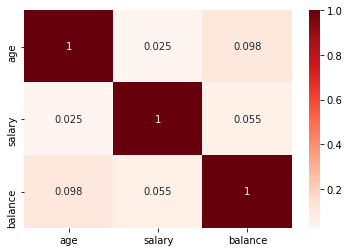

In [56]:
sns.heatmap(inp1[["age", "salary", "balance"]].corr(), annot= True, cmap= "Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [57]:
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [58]:
inp1.groupby("response")['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

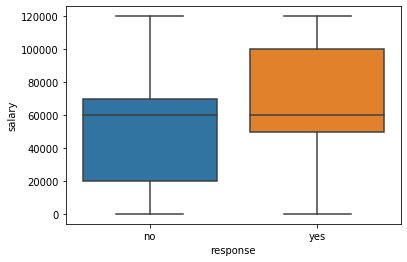

In [59]:
sns.boxplot(data= inp1, x= "response", y= "salary")
plt.show()

#### Balance vs response 

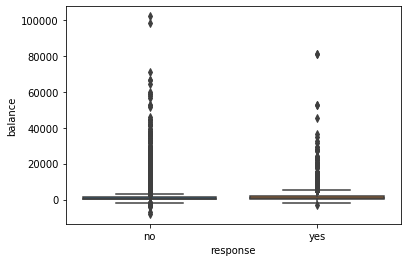

In [60]:
sns.boxplot(data= inp1, x= "response", y= "balance")
plt.show()

In [61]:
inp1.groupby("response")['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [62]:
inp1.groupby("response")['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile 

In [63]:
def p75(x):
    return np.quantile(x, 0.75)

In [64]:
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


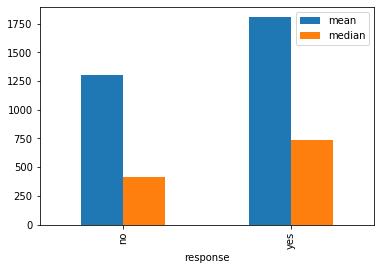

In [65]:
inp1.groupby('response')['balance'].aggregate(["mean", "median"]).plot.bar()

#### Education vs salary 

In [66]:
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [67]:
inp1.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

In [68]:
inp1.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

In [69]:
inp1.groupby('job')['salary'].median()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

### Segment- 5, Categorical categorical variable 

In [70]:
inp1['response_flag']= np.where(inp1.response== 'yes',1,0)

In [71]:
inp1.response_flag.value_counts(normalize= True)

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

#### Education vs response rate

In [72]:
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [73]:
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

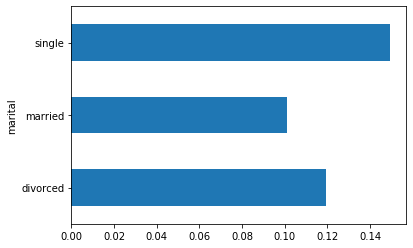

In [74]:
inp1.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

#### Loans vs response rate 

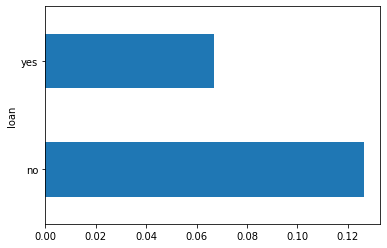

In [75]:
inp1.groupby(['loan'])['response_flag'].mean().plot.barh()
plt.show()

#### Housing loans vs response rate 

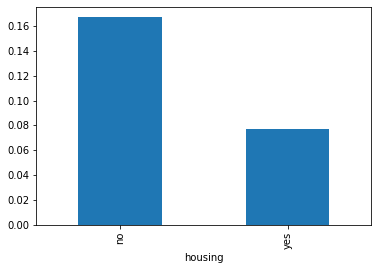

In [76]:
inp1.groupby(['housing'])['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response 

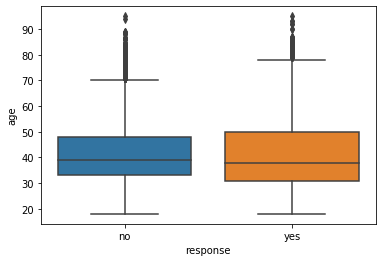

In [77]:
sns.boxplot(data= inp1, x= "response", y= "age")
plt.show()

##### making buckets from age columns 

In [78]:
inp1["age_group"]= pd.cut(inp1.age, [0,30,40,50,60,9999], labels= ["<30", "30-40", "40-50", "50-60", "60+"])
inp1.age_group.value_counts(normalize= True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

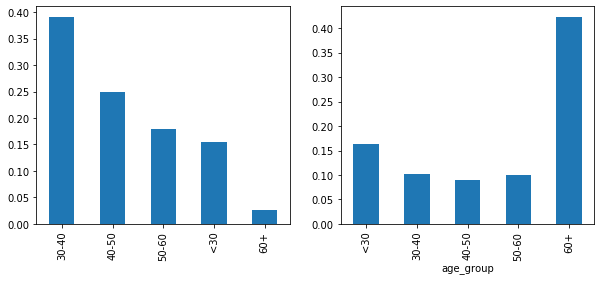

In [79]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])['response_flag'].mean().plot.bar()
plt.show()

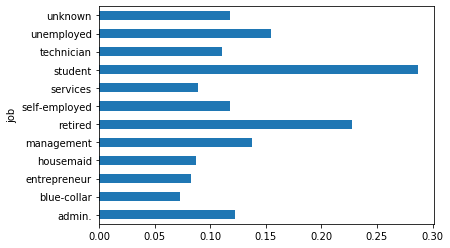

In [80]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

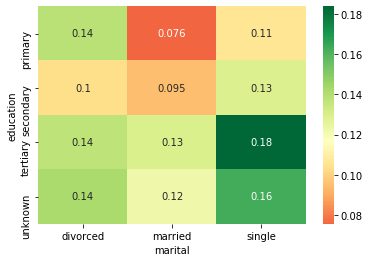

In [88]:
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

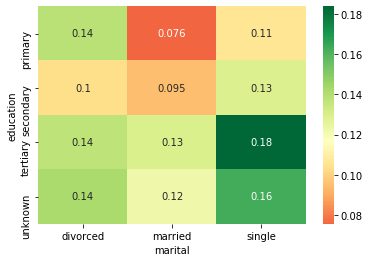

In [89]:
sns.heatmap(res,annot=True, cmap='RdYlGn',center=0.117)

#### Job vs marital vs response 

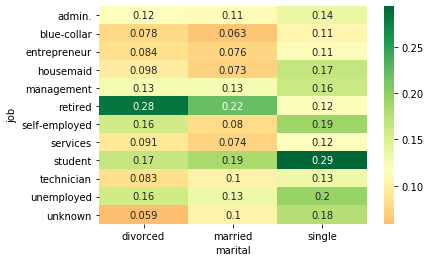

In [82]:
# Job vs marital vs response.
res = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

#### Education vs poutcome vs response

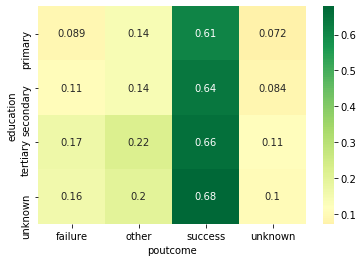

In [83]:
# education vs poutcome vs response.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

Notice here that we are taking the average as 0.117 which was average for overall data, but when we are looking at poutcomes we are also looking at folks who have been contacted earlier, hence maybe we need to recalculate the average

In [91]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


In [92]:
inp1[inp1.pdays>0].response_flag.mean()

0.2307785593014795

As we can see the avg of the people already contacted is double, hence we need to account that

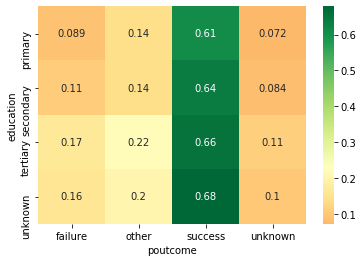

In [93]:
# education vs poutcome vs response.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.2308)
plt.show()

What insights do you see from this plot?